## Import Libraries

In [1]:
# import packages
import pandas as pd
import numpy as np
from scipy import stats

from datetime import datetime

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_theme(style="darkgrid", rc={"figure.figsize":(12, 5)})

from feature_engine.datetime import DatetimeFeatures


## Load Dataset

In [2]:
# load dataset
url = 'monthly_sales_data.csv'
sales_data = pd.read_csv(url)

In [3]:
# show dataset
sales_data.head()

,Category,Month,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion
0,Sports,2002-01-01,108592,2002,1,Xbox,1,0
1,RPG,2002-02-01,129387,2002,4,Nintendo,0,0
2,Sports,2002-03-01,114777,2002,4,PC,0,0
3,Sports,2002-04-01,71738,2002,0,Nintendo,0,0
4,Simulation,2002-05-01,142512,2002,2,PlayStation,0,0


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category       264 non-null    object
 1   Month          264 non-null    object
 2   Monthly Sales  264 non-null    int64 
 3   Year           264 non-null    int64 
 4   DayOfWeek      264 non-null    int64 
 5   Platform       264 non-null    object
 6   Holiday        264 non-null    int64 
 7   Promotion      264 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 16.6+ KB


In [5]:
sales_data.isna().sum()

Category         0
Month            0
Monthly Sales    0
Year             0
DayOfWeek        0
Platform         0
Holiday          0
Promotion        0
dtype: int64

In [6]:
# Convert Month column to datetime object
sales_data['Month'] = pd.to_datetime(sales_data['Month'])

## Time Series Distribution

<Axes: xlabel='Month', ylabel='Monthly Sales'>

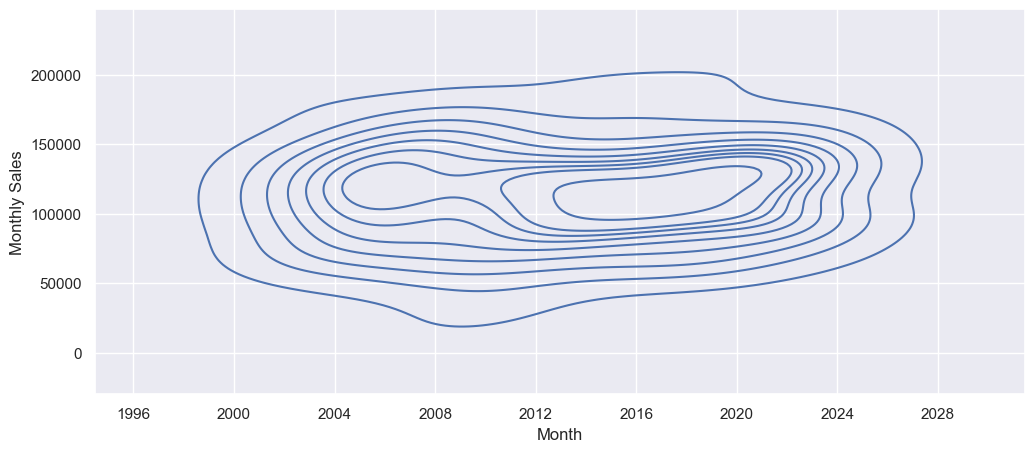

In [7]:
sns.kdeplot(sales_data, x='Month', y='Monthly Sales') #,  hue='Platform', fill=False)

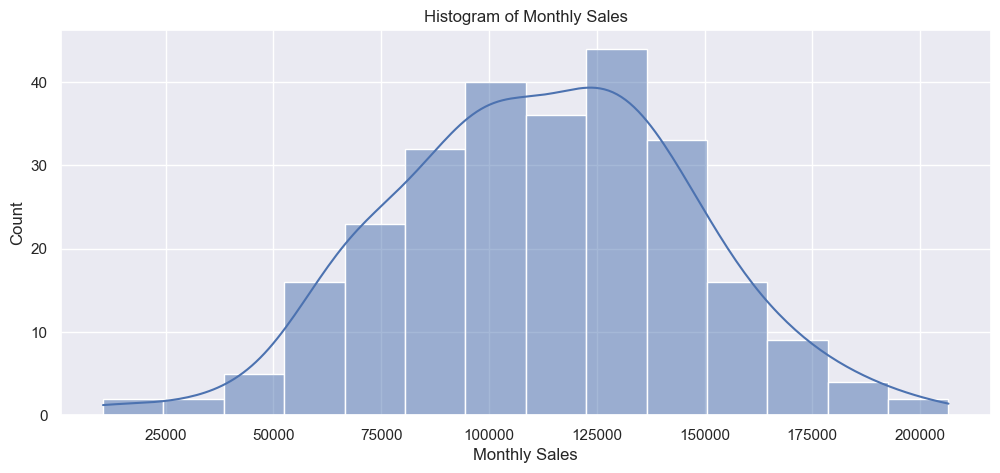

In [8]:
# plot the histogram of the time series
sns.histplot(sales_data, x='Monthly Sales', kde=True)  
plt.title('Histogram of Monthly Sales');

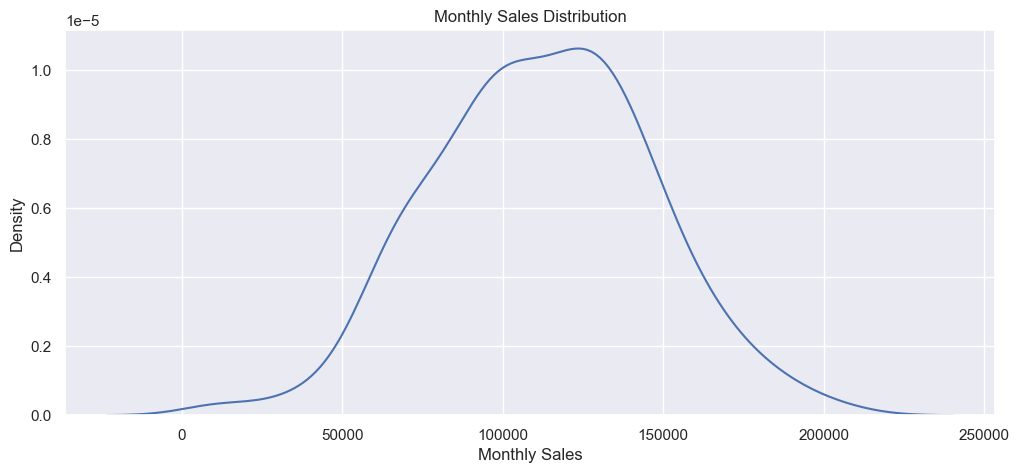

In [9]:
# visualise the distribution of the time series 
sns.kdeplot(sales_data, x='Monthly Sales')
plt.title('Monthly Sales Distribution');

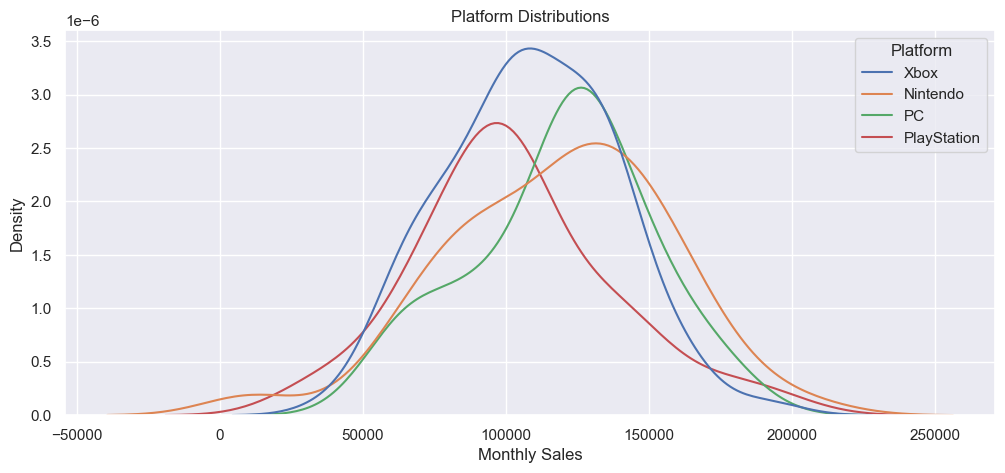

In [10]:
# Distribution of various platforms
sns.kdeplot(sales_data, x='Monthly Sales', hue='Platform')
plt.title('Platform Distributions');

Text(0.5, 1.0, 'Category Distributions')

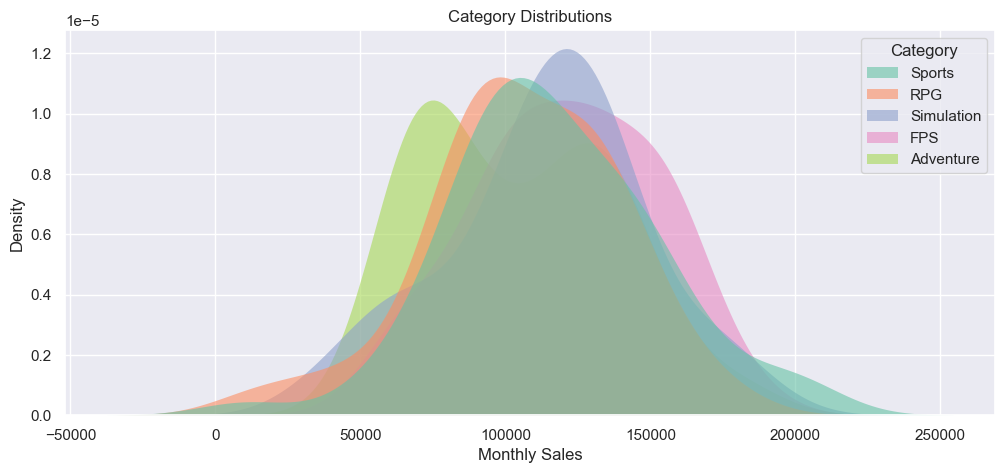

In [11]:
# Distribution of the ccategories
sns.kdeplot(sales_data, x='Monthly Sales', hue='Category',
   fill=True, common_norm=False, palette="Set2",
   alpha=.6, linewidth=0,)
plt.title('Category Distributions')

In [12]:
# set the index axisto 'Month' and peek into time series
df_sales = sales_data.set_index('Month')
df_sales.head()

,Category,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion
Month,,,,,,,
2002-01-01,Sports,108592,2002,1,Xbox,1,0
2002-02-01,RPG,129387,2002,4,Nintendo,0,0
2002-03-01,Sports,114777,2002,4,PC,0,0
2002-04-01,Sports,71738,2002,0,Nintendo,0,0
2002-05-01,Simulation,142512,2002,2,PlayStation,0,0


## Plot Time Series

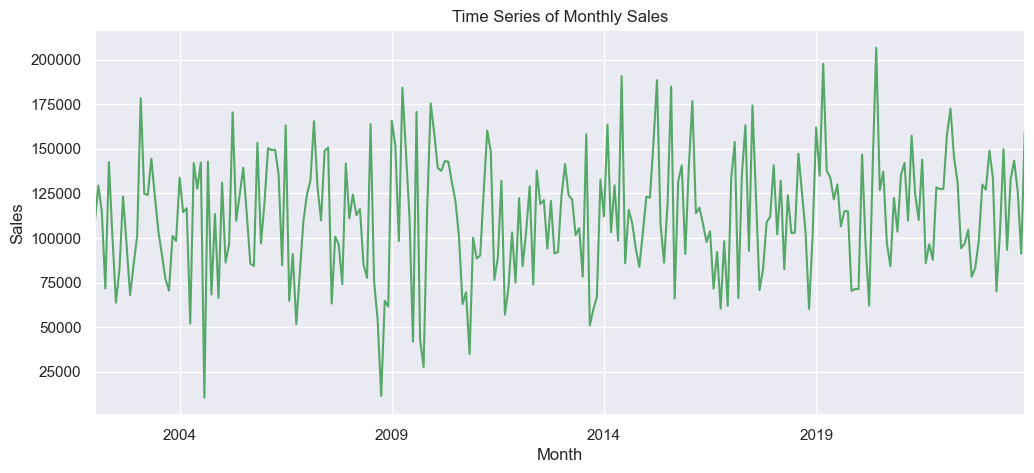

In [13]:
# plot the time series
color_pal = sns.color_palette()
df_sales['Monthly Sales'].plot(style='-', figsize=(12,5), ms=2, title='Time Series of Monthly Sales', 
                               color= color_pal[2], ylabel='Sales');

## Exploratory Data Analysis

In [14]:
# get features in dataset
df_sales.columns

Index(['Category', 'Monthly Sales', 'Year', 'DayOfWeek', 'Platform', 'Holiday',
       'Promotion'],
      dtype='object')

In [15]:
# Number of categories
print('Number of Unique Categories: ', df_sales['Category'].nunique())
print('List of Categories: ', df_sales['Category'].unique())

Number of Unique Categories:  5
List of Categories:  ['Sports' 'RPG' 'Simulation' 'FPS' 'Adventure']


In [16]:
# Number of platforms
print('Number of Unique Platforms: ', df_sales['Platform'].nunique())
print('List of Platforms: ', df_sales['Platform'].unique())

Number of Unique Platforms:  4
List of Platforms:  ['Xbox' 'Nintendo' 'PC' 'PlayStation']


### Explore the Categorical Features with Respect to Monthly Sales

#### Category with respect to the Monthly Sales

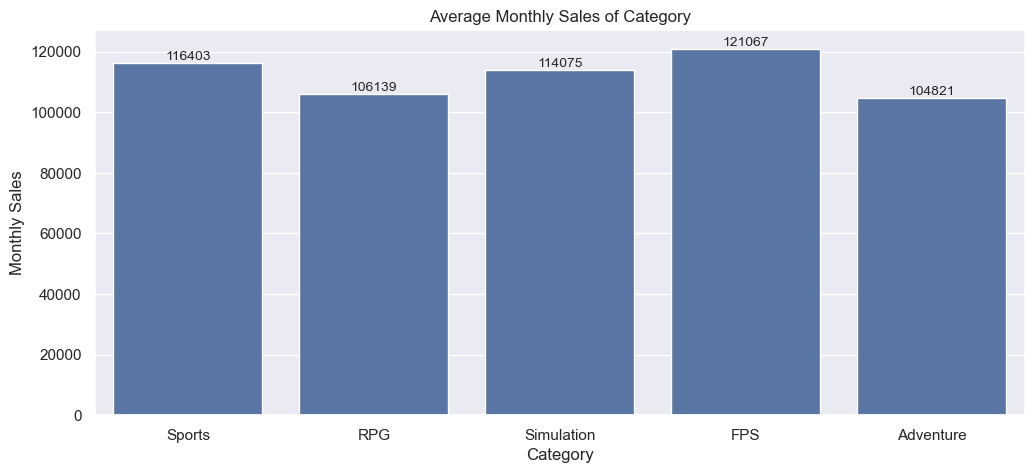

In [17]:
# bar plot of Category
ax = sns.barplot(
    df_sales, x='Category', y='Monthly Sales', estimator='mean', errorbar=None)
ax.set_title('Average Monthly Sales of Category')
ax.bar_label(ax.containers[0], fontsize=10);

In [18]:
# percentage of each category
cat_percent = df_sales.groupby(['Category'])['Monthly Sales'].sum()
cat_percent = cat_percent/cat_percent.sum()
cat_percent

Category
Adventure     0.194374
FPS           0.191845
RPG           0.186083
Simulation    0.196149
Sports        0.231549
Name: Monthly Sales, dtype: float64

#### Platform with respect to the Monthly Sales

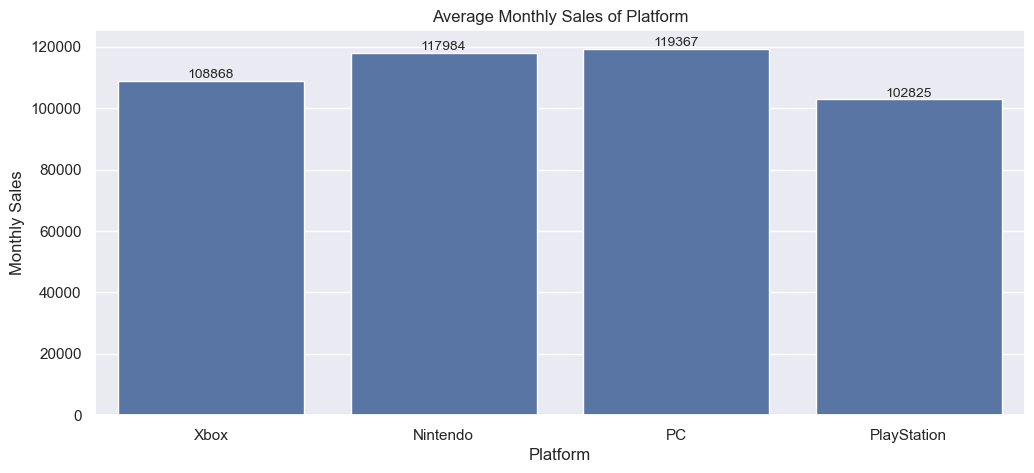

In [19]:
# bar plot of Platforms
ax = sns.barplot(
    df_sales, x='Platform', y='Monthly Sales', errorbar=None)
ax.set_title('Average Monthly Sales of Platform')
ax.bar_label(ax.containers[0], fontsize=10);

In [20]:
# percentage of each platform
plat_percent = df_sales.groupby(['Platform'])['Monthly Sales'].sum()
plat_percent = plat_percent/plat_percent.sum()
plat_percent

Platform
Nintendo       0.274472
PC             0.245495
PlayStation    0.201073
Xbox           0.278960
Name: Monthly Sales, dtype: float64

#### Frequency of Sales Demand for Platforms Within Each Category.

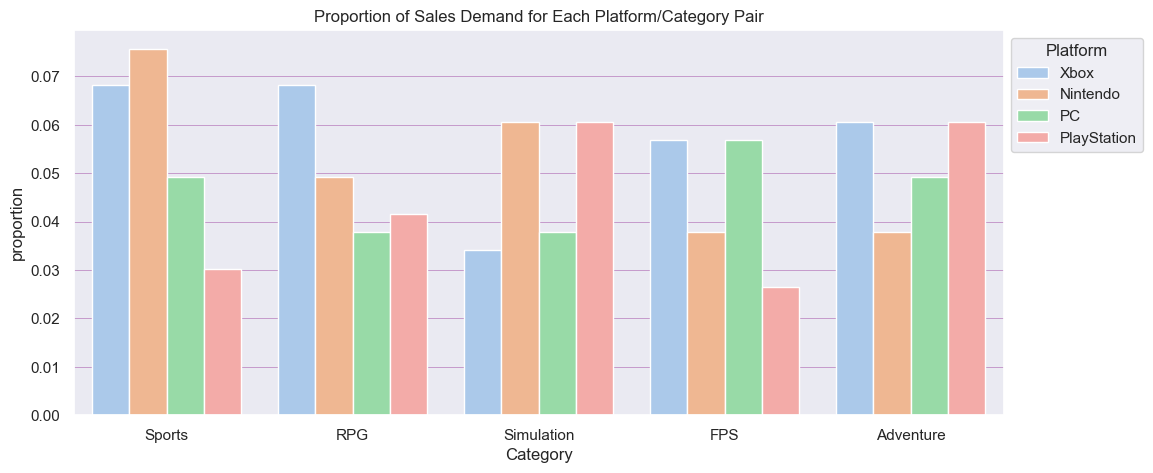

In [21]:
# plot the countplot to know the frequency of demand for category of each platform
ax = sns.countplot(df_sales, x='Category', hue='Platform', palette='pastel', stat='proportion')
ax.yaxis.grid(linewidth=.4, alpha=.6, color='purple')
ax.set_title('Proportion of Sales Demand for Each Platform/Category Pair')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [22]:
sales_count = sales_data[['Category', 'Platform']].value_counts().reset_index()
sales_count.head()

,Category,Platform,count
0,Sports,Nintendo,20
1,Sports,Xbox,18
2,RPG,Xbox,18
3,Simulation,Nintendo,16
4,Adventure,PlayStation,16


#### Spread of the Monthly Sales for Category/Platform.

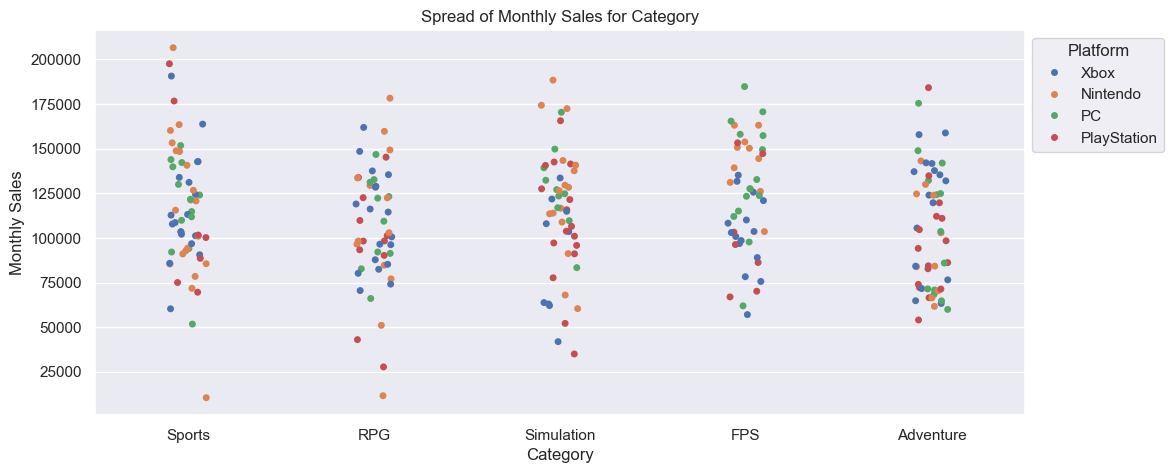

In [23]:
# visualise the range of monthly sales for Category
ax = sns.stripplot(df_sales, x='Category', y='Monthly Sales', hue='Platform')
ax.set_title('Spread of Monthly Sales for Category')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

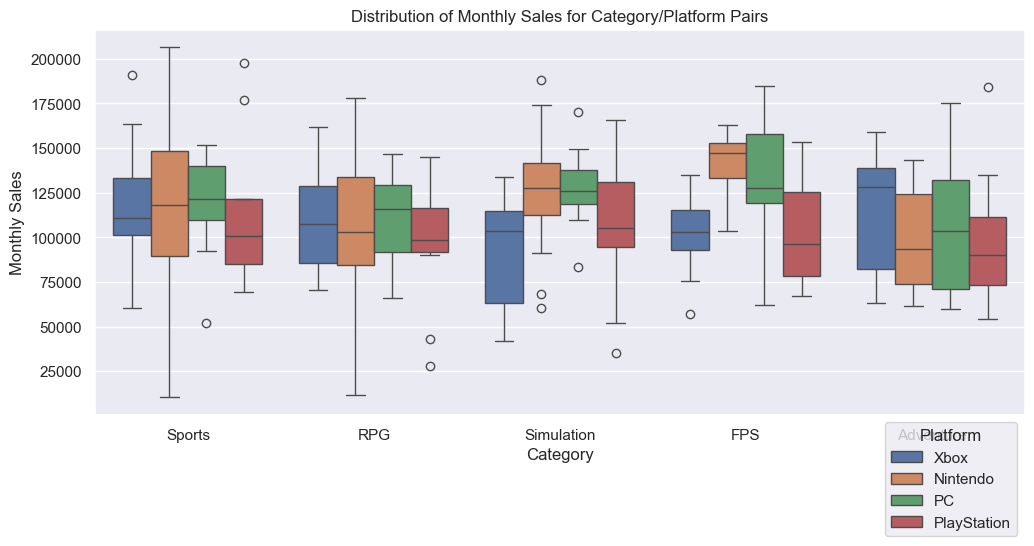

In [24]:
# visualise the distributions of Monthly sales across Platform/Category pairs
ax = sns.boxplot(df_sales, x='Category', y='Monthly Sales', hue='Platform')
sns.move_legend(ax, "upper right", bbox_to_anchor=(1, 0))
ax.set_title('Distribution of Monthly Sales for Category/Platform Pairs');

#### Spread for Category

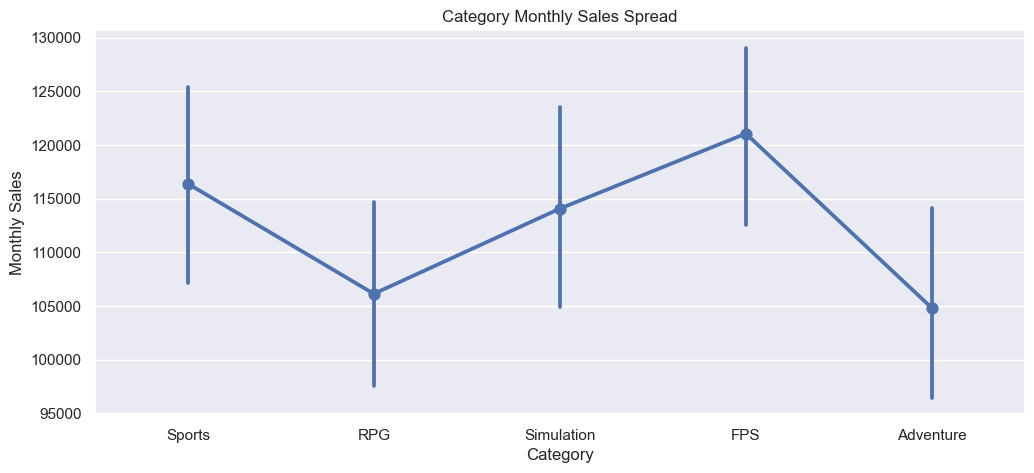

In [25]:
# visualise spread for Category
sns.pointplot(data=df_sales, x='Category', y='Monthly Sales').set_title('Category Monthly Sales Spread');

#### Spread for Platform

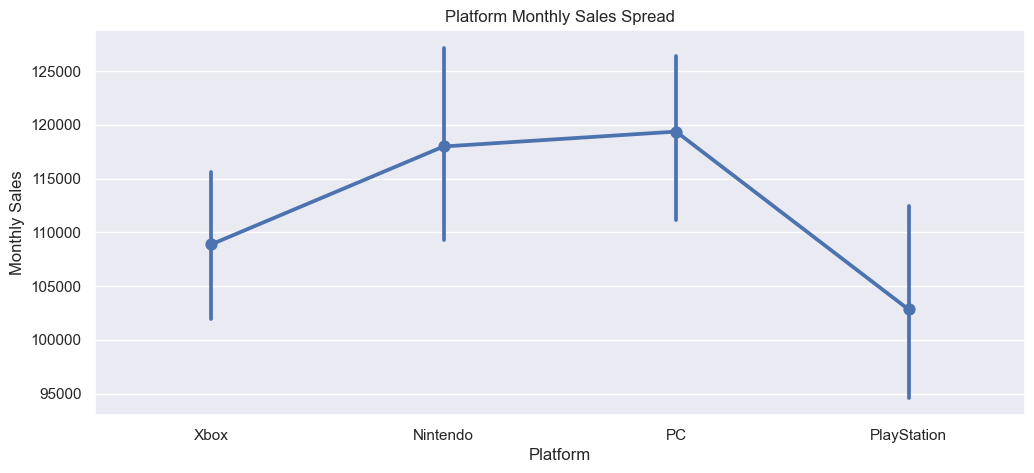

In [26]:
# visualise Monthly Sales spread for platform
sns.pointplot(data=df_sales, x='Platform', y='Monthly Sales').set_title('Platform Monthly Sales Spread');

### Create Category-Platform Feature

In [27]:
# create new column in dataset
df_sales['Category-Platform'] = df_sales['Category'] + ' -- ' + df_sales['Platform'].str[:4]

In [28]:
df_sales.head()

,Category,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion,Category-Platform
Month,,,,,,,,
2002-01-01,Sports,108592,2002,1,Xbox,1,0,Sports -- Xbox
2002-02-01,RPG,129387,2002,4,Nintendo,0,0,RPG -- Nint
2002-03-01,Sports,114777,2002,4,PC,0,0,Sports -- PC
2002-04-01,Sports,71738,2002,0,Nintendo,0,0,Sports -- Nint
2002-05-01,Simulation,142512,2002,2,PlayStation,0,0,Simulation -- Play


In [29]:
pair_cat = df_sales.groupby('Category-Platform')[['Monthly Sales']].apply(lambda x: x)
pair_cat.head()

Monthly Sales
Category-Platform Month                    
Adventure -- Nint 2005-06-01         124640
                  2008-12-01          61619
                  2010-04-01         143130
                  2012-02-01          84180
                  2014-11-01          83831

#### Spread with Respect to Category-Platform

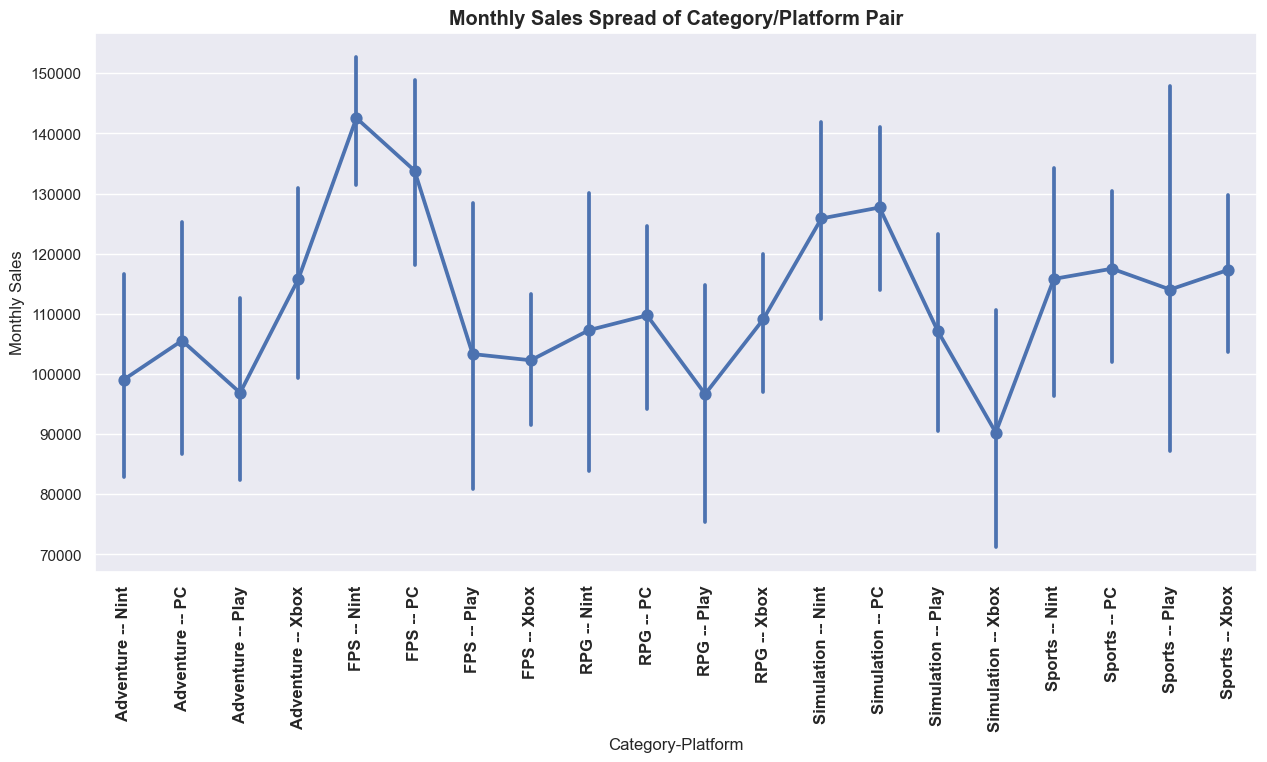

In [30]:
# visualise spread of Monthly Salary with respect to Category/Platform 
plt.figure(figsize=(15,7))
ax = sns.pointplot(data=pair_cat, x='Category-Platform', y='Monthly Sales');
ax.set_title('Monthly Sales Spread of Category/Platform Pair', fontsize='large', fontweight='bold')
plt.xticks(rotation = 90, fontsize='medium', fontweight='bold');
# plt.tick_params(labelsize='small', labelrotation=90)

### Correlation Between Frequency of Demand and Total Sales for Category/Platform Pairs. 

In [31]:
# create the dataframe for sum and count of each pair
count_sales = df_sales.groupby(['Category-Platform'])[['Monthly Sales']]\
                                .agg(['sum', 'count'])

count_sales.columns = count_sales.columns.droplevel(level=0)

In [32]:
count_sales.sort_values('count', ascending=False).head()

,sum,count
Category-Platform,,
Sports -- Nint,2316178,20
Sports -- Xbox,2111641,18
RPG -- Xbox,1963657,18
Simulation -- Nint,2013677,16
Adventure -- Play,1550080,16


Total Sum/Purchase Frequency Correlation Coeffiecient =  0.9395311926381725


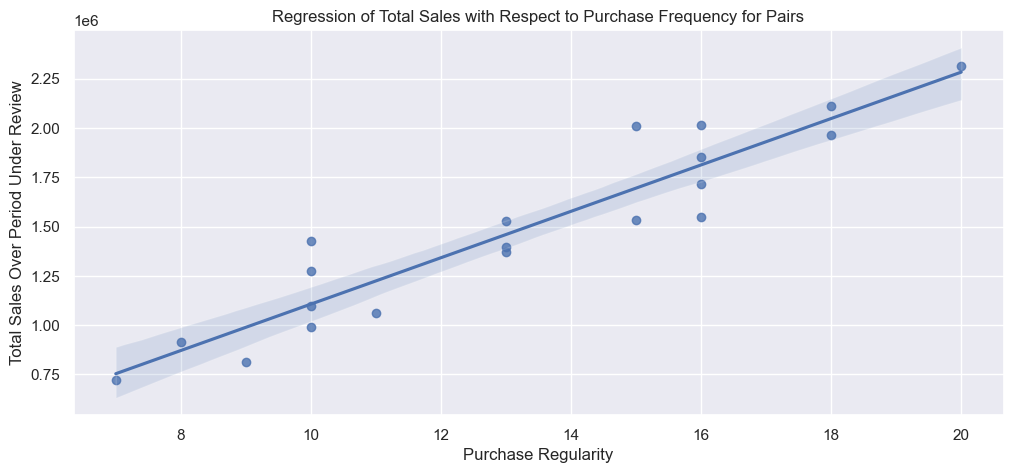

In [33]:
# visualise the regression
ax = sns.regplot(data=count_sales, x='count', y='sum')
ax.set_title('Regression of Total Sales with Respect to Purchase Frequency for Pairs')
plt.xlabel('Purchase Regularity')
plt.ylabel('Total Sales Over Period Under Review')

# calculate correlation coerfficient between count and sum 
x = count_sales['count']
y = count_sales['sum']
res = stats.pearsonr(x, y)
print('Total Sum/Purchase Frequency Correlation Coeffiecient = ', res[0])

#### Linear Relationship Between 'count' and 'sum'

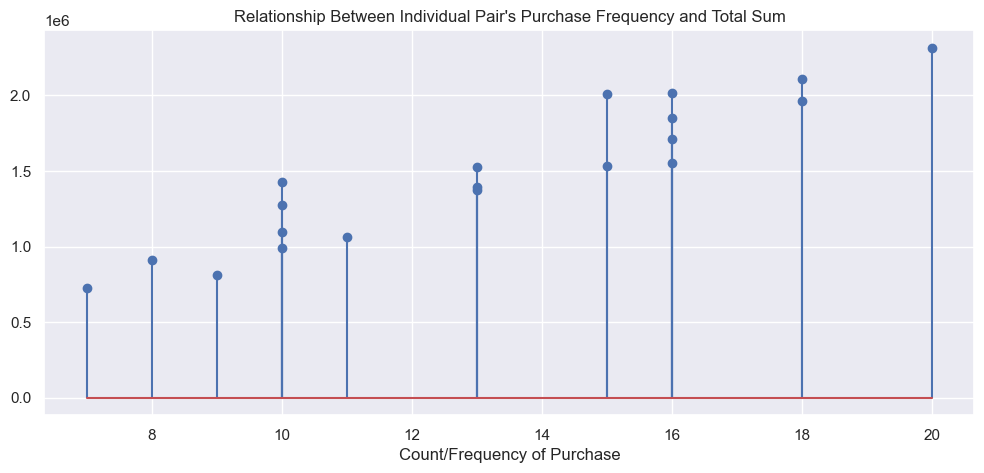

In [34]:
# visualise the the linear relationship between count and sum
plt.stem(x, y)
plt.xlabel('Count/Frequency of Purchase')
plt.title("Relationship Between Individual Pair's Purchase Frequency and Total Sum")
plt.show()

### Heatmap of Correlation Between Category/Platform Pair and Sales

In [35]:
# dataframe for catagory-platform
cat_platform = df_sales.groupby(['Category', 'Platform'])['Monthly Sales'].apply('sum').reset_index()

cat_platform['Sales Proportion'] = cat_platform['Monthly Sales'].divide(cat_platform['Monthly Sales'].sum())

In [36]:
# create a pivot table
table = cat_platform.pivot(index='Category', columns=['Platform'], values='Sales Proportion')

In [37]:
table

Platform,Nintendo,PC,PlayStation,Xbox
Category,,,,
Adventure,0.033407,0.046264,0.052261,0.062442
FPS,0.048060,0.067674,0.024384,0.051727
RPG,0.047023,0.037005,0.035850,0.066205
Simulation,0.067892,0.043048,0.057818,0.027391
Sports,0.078091,0.051504,0.030759,0.071195


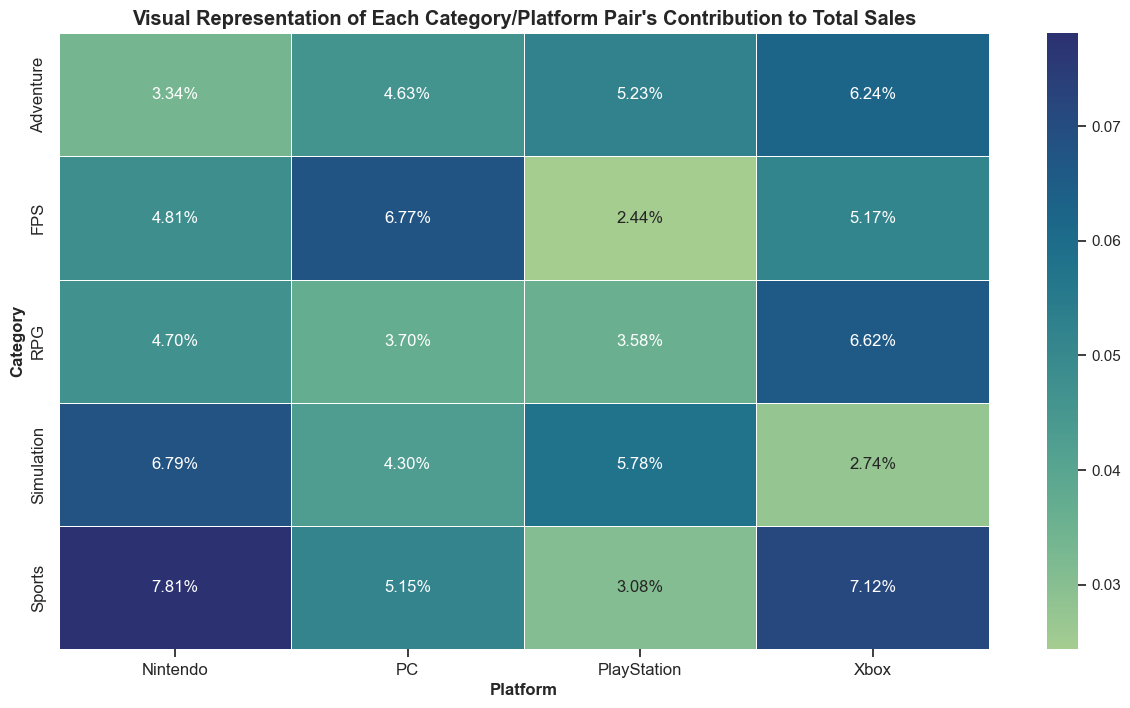

In [38]:
# visualise the table
plt.figure(figsize=(15,8))

ax = sns.heatmap(table, annot=True, cmap='crest', linewidth=.5, fmt='.2%');
ax.set_title("Visual Representation of Each Category/Platform Pair's Contribution to Total Sales", fontsize='large',
            fontweight='bold')
plt.xticks(fontsize='medium', fontweight='medium')
plt.yticks(fontsize='medium', fontweight='medium')
plt.xlabel('Platform', fontsize='medium', fontweight='bold')
plt.ylabel('Category', fontsize='medium', fontweight='bold')
ax.xaxis.tick_bottom()

In [39]:
monthly_ave = df_sales['Monthly Sales'].mean()
monthly_ave

112349.00378787878

In [40]:
# dataframe for category-platform
cat_platform_month = df_sales.groupby(['Category', 'Platform'])['Monthly Sales'].apply('mean').reset_index()

cat_platform_month['Sales Proportion'] = cat_platform_month['Monthly Sales'].divide(monthly_ave)

In [41]:
# create a pivot table
table_month = cat_platform_month.pivot(index='Category', columns=['Platform'], values='Sales Proportion')

In [42]:
table_month

Platform,Nintendo,PC,PlayStation,Xbox
Category,,,,
Adventure,0.881937,0.939506,0.862313,1.030293
FPS,1.268782,1.191062,0.919622,0.910402
RPG,0.954933,0.976927,0.860392,0.971010
Simulation,1.120213,1.136469,0.954004,0.803469
Sports,1.030796,1.045936,1.015060,1.044187


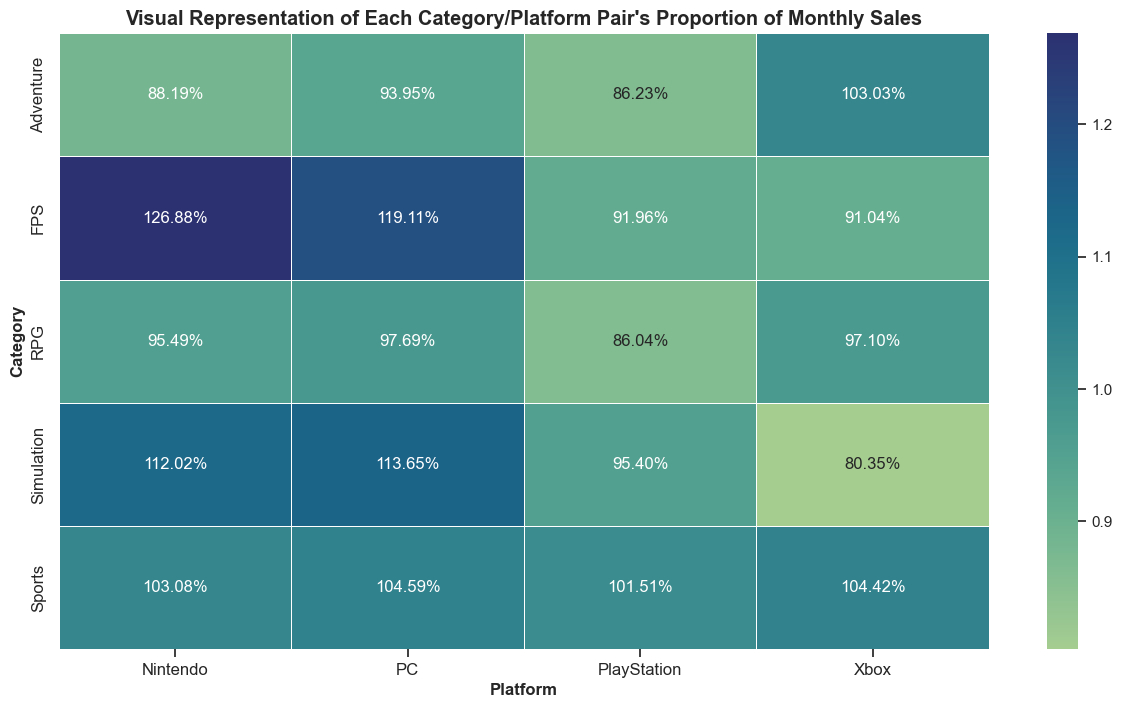

In [43]:
# visualise the table
plt.figure(figsize=(15,8))

ax = sns.heatmap(table_month, annot=True, cmap='crest', linewidth=.5, fmt='.2%');
ax.set_title("Visual Representation of Each Category/Platform Pair's Proportion of Monthly Sales", fontsize='large',
            fontweight='bold')
plt.xticks(fontsize='medium', fontweight='medium')
plt.yticks(fontsize='medium', fontweight='medium')
plt.xlabel('Platform', fontsize='medium', fontweight='bold')
plt.ylabel('Category', fontsize='medium', fontweight='bold')
ax.xaxis.tick_bottom()

## Exploring Date Features

In [44]:
# extract more date features from the 'Month' feature
extract_dt = DatetimeFeatures( variables='Month', features_to_extract=['quarter', 'month', 'weekend'])
df_sales_time = extract_dt.fit_transform(sales_data)

In [45]:
df_sales_time.sample(7)

,Category,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion,Month_quarter,Month_month,Month_weekend
199,FPS,147215,2018,2,PlayStation,0,0,3,8,0
49,FPS,150245,2006,2,Nintendo,0,0,1,2,0
31,Sports,10469,2004,6,Nintendo,0,0,3,8,1
111,Sports,160201,2011,4,Nintendo,0,1,2,4,0
72,Adventure,110973,2008,1,PlayStation,1,0,1,1,0
14,Adventure,124843,2003,5,PC,0,0,1,3,1
100,Sports,142692,2010,5,Xbox,0,1,2,5,1


In [46]:
grouped = df_sales_time.groupby(['Month_month'])[['Year', 'Monthly Sales']]

### Visualise the Monthly Trend Over the Years

- Although the Time Series does noot exhibit any overt trend, let's visualse it all the same.

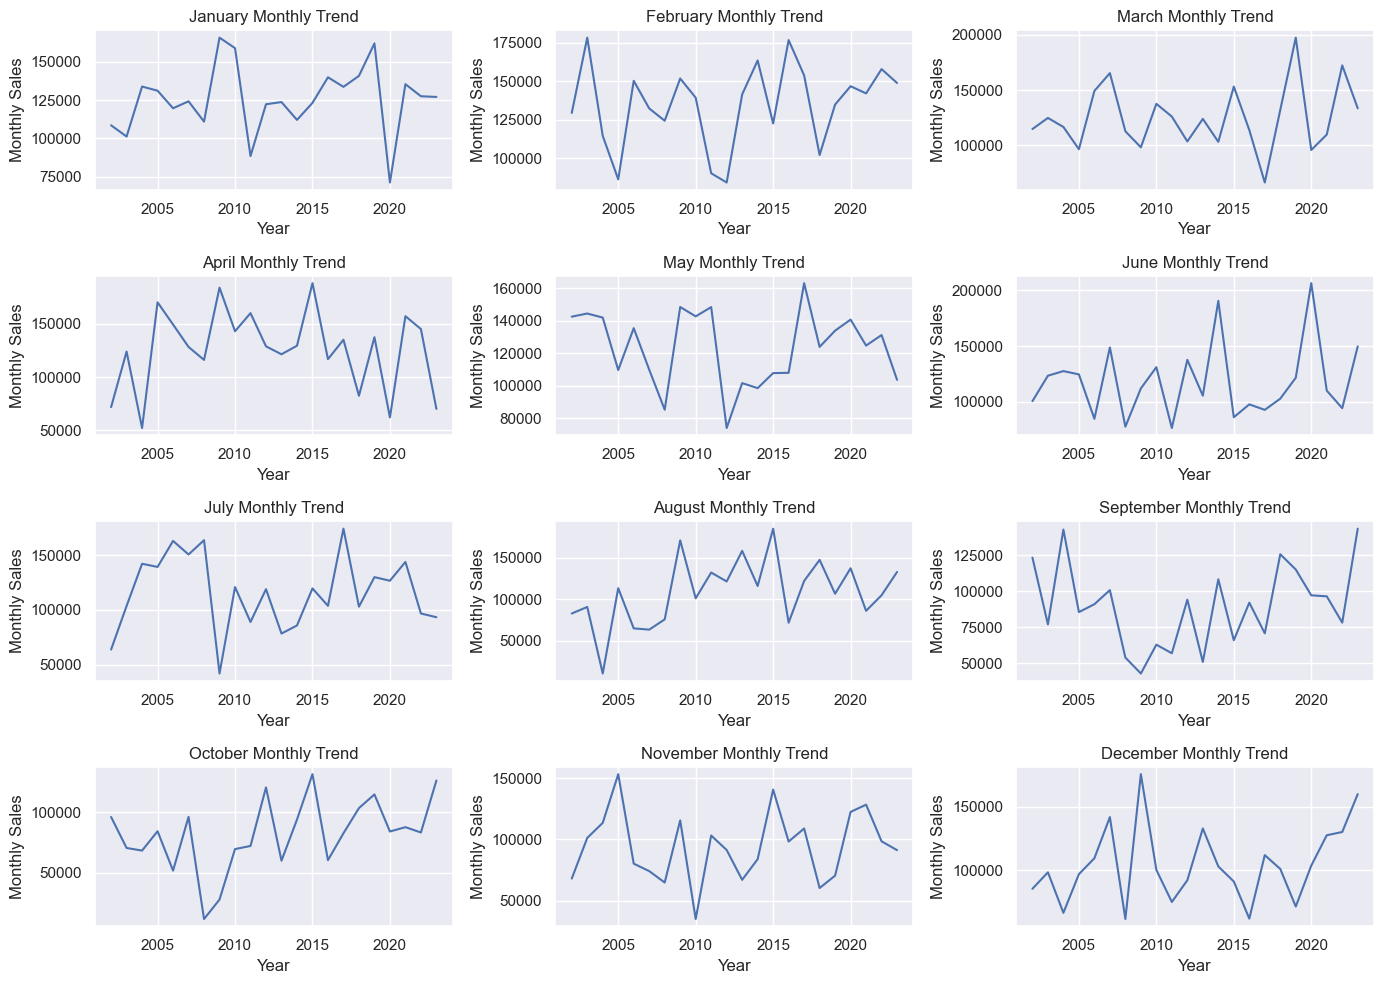

In [47]:
# visualise the the trend for each month across the Time Series
import calendar

fig, axs = plt.subplots(4, 3, figsize=(14, 10))

for ax, m in zip(axs.flatten(), df_sales_time['Month_month'].unique()):
    sns.lineplot(data=grouped.get_group((m,)), x='Year', y='Monthly Sales', ax=ax)
    ax.set_title(f'{calendar.month_name[m]} Monthly Trend')
    ax.set_xlabel('Year')
    ax.set_ylabel('Monthly Sales')
plt.tight_layout()
    


### Monthly Sales Across Time Series

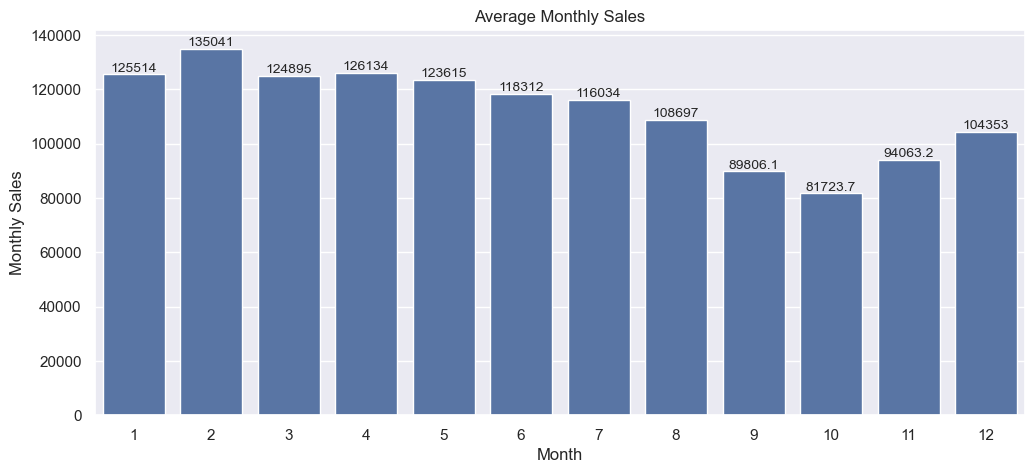

In [48]:
# bar plot of monthly sales across time series
ax = sns.barplot(
    df_sales_time, x='Month_month', y='Monthly Sales', estimator='mean', errorbar=None)
ax.set_title('Average Monthly Sales')
ax.set_xlabel('Month')
ax.bar_label(ax.containers[0], fontsize=10);

### Monthly Sales According to Week Days

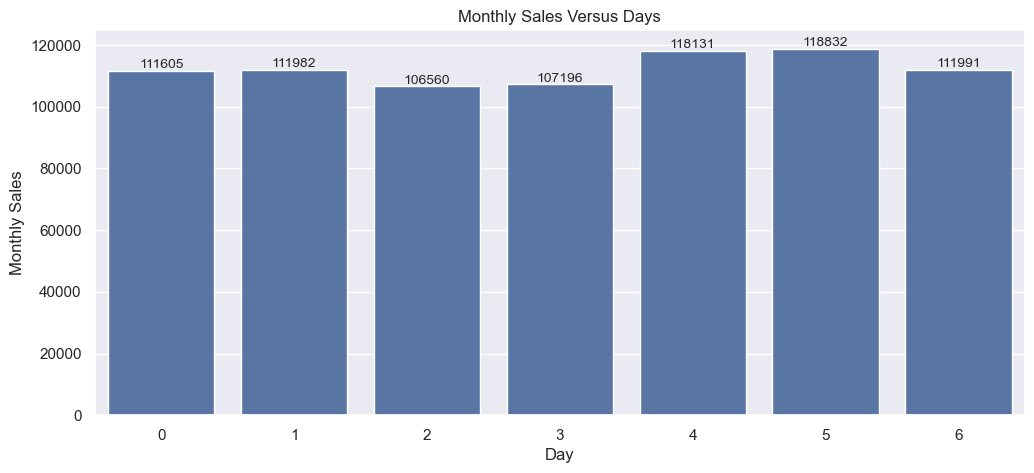

In [49]:
# bar plot of monthly sales for each week day
ax = sns.barplot(
    df_sales_time, x='DayOfWeek', y='Monthly Sales', estimator='mean', errorbar=None)
ax.set_title('Monthly Sales Versus Days')
ax.set_xlabel('Day')
ax.bar_label(ax.containers[0], fontsize=10);

### Quarterly Monthly Sales

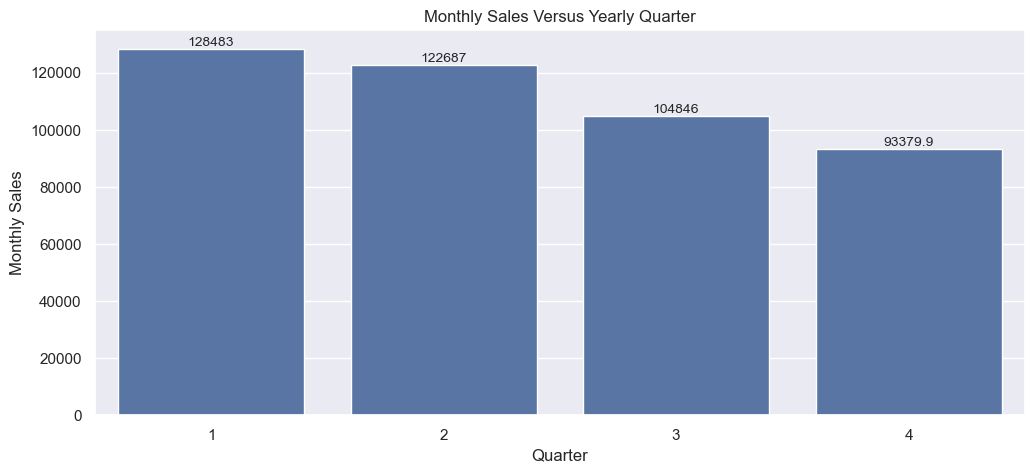

In [50]:
# bar plot of monthly sales for each quarter
ax = sns.barplot(
    df_sales_time, x='Month_quarter', y='Monthly Sales', estimator='mean', errorbar=None)
ax.set_title('Monthly Sales Versus Yearly Quarter')
ax.set_xlabel('Quarter')
ax.bar_label(ax.containers[0], fontsize=10);

## Holiday and Promotion Features

#### Promotion Analysis

In [51]:
# get timestamps for promotion
promo = df_sales[df_sales['Promotion'] == 1].index

In [52]:
promo

DatetimeIndex(['2002-07-01', '2003-04-01', '2003-05-01', '2003-10-01',
               '2004-10-01', '2004-11-01', '2005-02-01', '2005-05-01',
               '2006-04-01', '2006-07-01', '2007-07-01', '2008-09-01',
               '2008-11-01', '2008-12-01', '2009-01-01', '2009-02-01',
               '2009-11-01', '2010-02-01', '2010-03-01', '2010-05-01',
               '2010-06-01', '2010-07-01', '2011-02-01', '2011-04-01',
               '2011-07-01', '2011-10-01', '2012-01-01', '2012-05-01',
               '2012-07-01', '2012-11-01', '2013-11-01', '2014-02-01',
               '2014-04-01', '2015-07-01', '2015-12-01', '2016-05-01',
               '2016-07-01', '2016-10-01', '2016-12-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2018-09-01', '2019-01-01',
               '2019-02-01', '2019-07-01', '2020-01-01', '2020-02-01',
               '2020-09-01', '2022-04-01', '2022-09-01', '2023-03-01',
               '2023-06-01', '2023-10-01'],
              dtype='datetime64[n

In [53]:
# create a dataframe to process the promotion feature
dt_init = df_sales.index[0]
lst = []
for i, dt in enumerate(promo):
    if i:
        mem = (df_sales.loc[(df_sales.index < dt) & (df_sales.index >  dt_init)]['Monthly Sales'].mean(), 
        df_sales.loc[(df_sales.index < dt) & (df_sales.index >  dt_init)]['Monthly Sales'].min(), 'pr', dt)
        lst.append(mem)
    
    else:
        mem = (df_sales.loc[(df_sales.index < dt)]['Monthly Sales'].mean(),
        df_sales.loc[(df_sales.index < dt)]['Monthly Sales'].min(), 'pr', dt)
        lst.append(mem)
    
    mem = [df_sales.loc[dt]['Monthly Sales'],] * 2
    mem.append(dt)
    lst.append(mem)
    dt_init = dt

    if ((promo[-1] == dt) & (dt < df_sales.index[-1])):
        mem = (df_sales.loc[(df_sales.index > dt)]['Monthly Sales'].mean(),
        df_sales.loc[(df_sales.index > dt)]['Monthly Sales'].min(), 'pr', dt)
        lst.append(mem)

In [54]:
lst[-1]

(125460.5, 91200, 'pr', Timestamp('2023-10-01 00:00:00'))

In [55]:
df_promo = pd.DataFrame(lst, columns=['Mean', 'Min', 'Period', 'Month'])
df_promo.loc[df_promo['Period'] != 'pr', ['Period']] = 'du'
df_promo.ffill(inplace=True)

In [56]:
df_promo.head()

,Mean,Min,Period,Month
0,111262.166667,71738.0,pr,2002-07-01
1,63758.000000,63758.0,du,2002-07-01
2,107490.500000,67980.0,pr,2003-04-01
3,124041.000000,124041.0,du,2003-04-01
4,124041.000000,124041.0,pr,2003-05-01


In [57]:
# calculate the the difference between intervening entries in the 'df_promo' dataframe
# for 'Mean' and 'Min'. 
df_promo['Mean_diff'] = df_promo[['Mean']].diff()
df_promo['Min_diff'] = df_promo[['Min']].diff()

#### Plots of Promotions and their Effect on Average Monthly Sales Before, During and After.

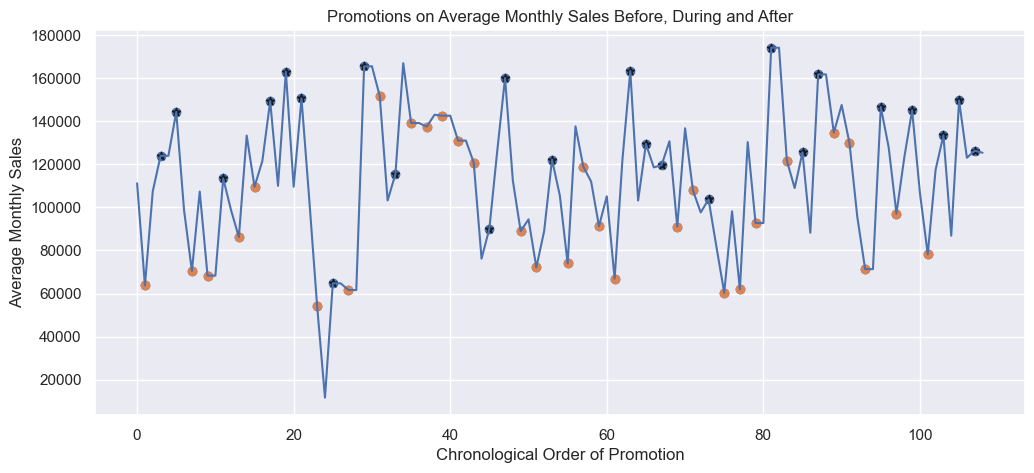

In [58]:
# plot the df_promo and show promo those have effect and otherwise
plt.plot(df_promo.iloc[:,0])
plt.scatter(df_promo[df_promo['Period']=='du'].index, df_promo.loc[df_promo['Period']=='du', 'Mean'])
plt.scatter(df_promo.loc[(df_promo['Mean_diff'] > 0) & (df_promo['Period'] == 'du')].index, 
            df_promo.loc[(df_promo['Mean_diff'] > 0) & (df_promo['Period'] == 'du'), 'Mean'], marker='*', c='k', alpha=1.0)
plt.scatter(df_promo.loc[(df_promo['Mean_diff'] <= 0) & (df_promo['Period'] == 'du')].index, 
            df_promo.loc[(df_promo['Mean_diff'] <= 0) & (df_promo['Period'] == 'du'), 'Mean'])
plt.xlabel('Chronological Order of Promotion')
plt.ylabel('Average Monthly Sales')
plt.title('Promotions on Average Monthly Sales Before, During and After');

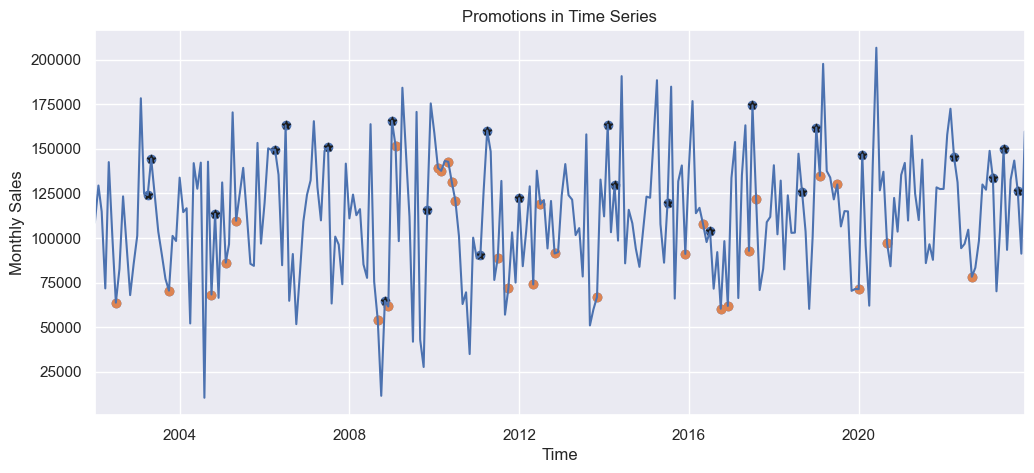

In [59]:
# plot the same promotions on the whole time series
plt.plot(df_sales['Monthly Sales']);
plt.scatter(df_promo[df_promo['Period']=='du']['Month'], df_promo.loc[df_promo['Period']=='du', 'Mean'])
plt.scatter(df_promo.loc[(df_promo['Mean_diff'] > 0) & (df_promo['Period'] == 'du')]['Month'], 
            df_promo.loc[(df_promo['Mean_diff'] > 0) & (df_promo['Period'] == 'du'), 'Mean'], marker='*', c='k', alpha=1.0)
plt.scatter(df_promo.loc[(df_promo['Mean_diff'] <= 0) & (df_promo['Period'] == 'du')]['Month'], 
            df_promo.loc[(df_promo['Mean_diff'] <= 0) & (df_promo['Period'] == 'du'), 'Mean'])
plt.xlim(df_sales.index[0], df_sales.index[-1])
plt.xlabel('Time')
plt.ylabel('Monthly Sales')
plt.title('Promotions in Time Series');

#### Percentage of Promotion that Result in Average Monthy Sales Increase

In [60]:
promo = df_promo[df_promo['Period'] == 'du'] # & df_sales['Mean_diff'] > 0]
promo.loc[promo['Mean_diff'] > 0, 'Period'] = 'incr'
promo.loc[promo['Mean_diff'] <= 0, 'Period'] = 'dec'

In [61]:
promo.shape

(54, 6)

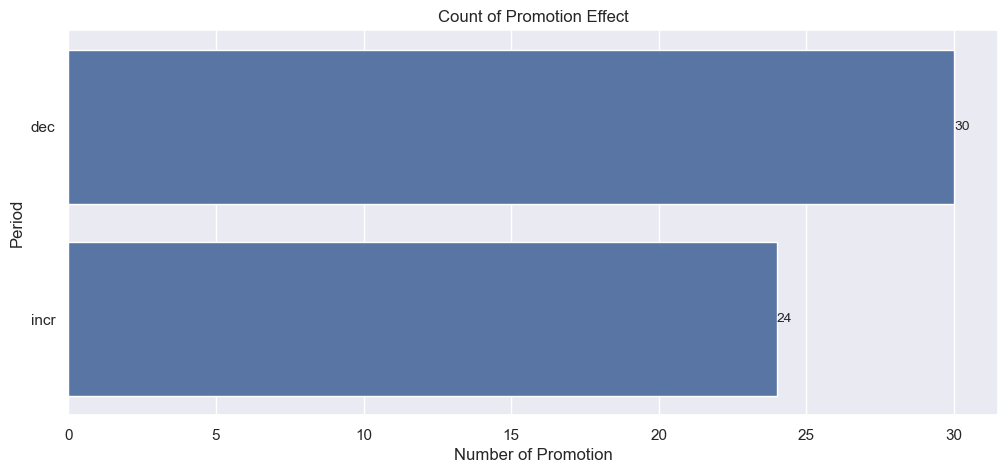

In [62]:
# plot the bar chart to visualize the cumulative average monthly sales across time series
ax = sns.barplot(promo['Period'], estimator='count', errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);
plt.xlabel('Number of Promotion')
plt.title('Count of Promotion Effect');

Marginal effect of Promotion on Monthly Sales across time series = 111433.11887834387


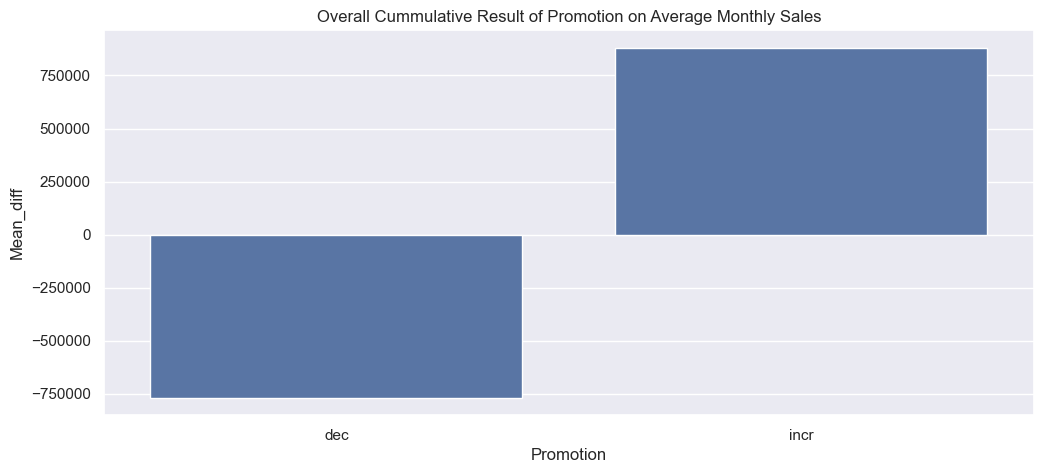

In [63]:
# plot the bar chart of number of promotion that result in both increase or decrease
sns.barplot(promo, x='Period', y='Mean_diff', estimator='sum', errorbar=None);
plt.xlabel('Promotion')
plt.title('Overall Cummulative Result of Promotion on Average Monthly Sales');
marginal_promo = promo['Mean_diff'].sum(0)
print(f"Marginal effect of Promotion on Monthly Sales across time series = {marginal_promo}")

In [64]:
pie_promo = promo['Period'].value_counts(normalize=True)

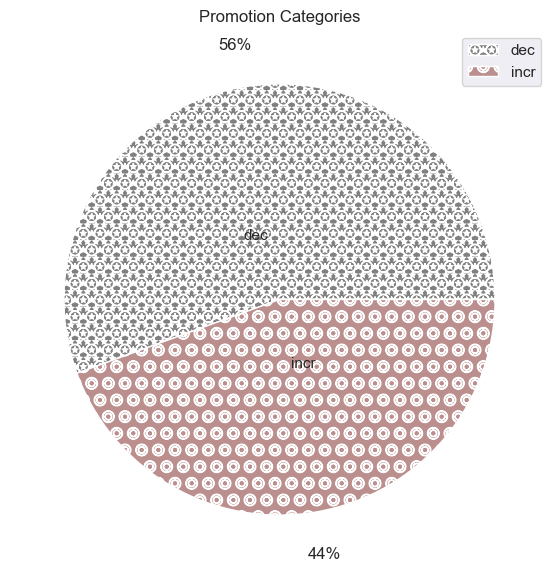

In [65]:
# visualise in a pie chart
plt.figure(figsize=(12,7))
plt.pie(x=pie_promo, labels=pie_promo.index, colors=['gray', 'rosybrown'], hatch=['**O', 'oO'], autopct='%1.0f%%',
        pctdistance=1.2, labeldistance=.3)
plt.title('Promotion Categories')
plt.legend();

#### Best and Worst Promotion

In [66]:
# get the best promotion
filter = promo['Mean_diff'] == promo['Mean_diff'].max()
best_promo = promo[filter]['Mean'].values[0]
best_promo_dt = promo[filter]['Month'].values[0]
best_promo_dt = pd.to_datetime(best_promo_dt).date().strftime('%Y-%m-%d')
best_incr = promo['Mean_diff'].max()

# get the worst promotion
filter = promo['Mean_diff'] == promo['Mean_diff'].min()
worst_promo = promo[filter]['Mean'].values[0]
worst_promo_dt = promo[filter]['Month'].values[0]
worst_promo_dt = pd.to_datetime(worst_promo_dt).date().strftime('%Y-%m-%d')                                                             
worst_decr = promo['Mean_diff'].min()

In [67]:
# print the most effective and least effective promotions
print(f'The most effective promotion was on {best_promo_dt} \
with the Average Monthly Sales of {best_promo} and marginal average increment of {best_incr}', end='\n\n')

print(f'The least effective promotion was on {worst_promo_dt} \
with the Average Monthly Sales of {worst_promo} and marginal average increment of {worst_decr}')

The most effective promotion was on 2009-01-01 with the Average Monthly Sales of 165648.0 and marginal average increment of 104029.0

The least effective promotion was on 2017-08-01 with the Average Monthly Sales of 121791.0 and marginal average increment of -52530.0


#### Holiday Analysis

In [68]:
# get timestamps for holidays
hol = df_sales[df_sales['Holiday'] == 1].index

In [69]:
# create a dataframe to process the holiday feature
dt_init = df_sales.index[0]
lst = []
for dt in hol:
    if dt.month == 1:
        mem = [df_sales.loc[dt]['Monthly Sales'],] * 2
        mem.extend(['hol', dt])
        lst.append(mem)
        dt_init = dt
    
    elif dt.month == 12:
        mem = (df_sales.loc[(df_sales.index > dt_init) & (df_sales.index < dt)]['Monthly Sales'].mean(),
        df_sales.loc[(df_sales.index > dt_init) & (df_sales.index < dt)]['Monthly Sales'].min(), 'wok', dt)
        lst.append(mem)
        
        mem = [df_sales.loc[dt]['Monthly Sales'],] * 2
        mem.extend(['hol', dt])
        lst.append(mem)

In [70]:
df_hol = pd.DataFrame(lst, columns=['Mean', 'Min', 'Period', 'Month'])
# df_hol.loc[df_promo['Period'] != 'pr', ['Period']] = 'du'
# df_hol.ffill(inplace=True)

In [71]:
df_hol.head()

,Mean,Min,Period,Month
0,108592.0,108592,hol,2002-01-01
1,99290.8,63758,wok,2002-12-01
2,85358.0,85358,hol,2002-12-01
3,101263.0,101263,hol,2003-01-01
4,113794.0,70480,wok,2003-12-01


In [72]:
# calculate the the difference between intervening entries in the 'df_hol' dataframe
# for 'Mean' and 'Min'. 
df_hol['Mean_diff'] = df_hol[['Mean']].diff()
df_hol['Min_diff'] = df_hol[['Min']].diff()

In [73]:
df_hol.head()

,Mean,Min,Period,Month,Mean_diff,Min_diff
0,108592.0,108592,hol,2002-01-01,NaN,NaN
1,99290.8,63758,wok,2002-12-01,-9301.2,-44834.0
2,85358.0,85358,hol,2002-12-01,-13932.8,21600.0
3,101263.0,101263,hol,2003-01-01,15905.0,15905.0
4,113794.0,70480,wok,2003-12-01,12531.0,-30783.0


#### Plots of Promotions and their Effect on Average Monthly Sales Before, During and After.

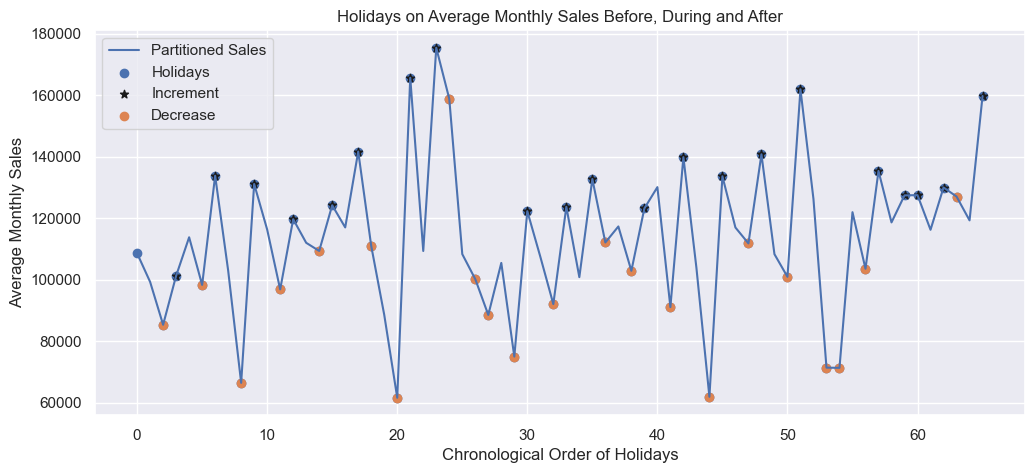

In [74]:
# plot the df_promo and show promo those have effect and otherwise
plt.plot(df_hol.iloc[:,0])
plt.scatter(df_hol[df_hol['Period']=='hol'].index, df_hol.loc[df_hol['Period']=='hol', 'Mean'])
plt.scatter(df_hol.loc[(df_hol['Mean_diff'] > 0) & (df_hol['Period'] == 'hol')].index, 
            df_hol.loc[(df_hol['Mean_diff'] > 0) & (df_hol['Period'] == 'hol'), 'Mean'], marker='*', c='k', alpha=1.0)
plt.scatter(df_hol.loc[(df_hol['Mean_diff'] <= 0) & (df_hol['Period'] == 'hol')].index, 
            df_hol.loc[(df_hol['Mean_diff'] <= 0) & (df_hol['Period'] == 'hol'), 'Mean'])
plt.xlabel('Chronological Order of Holidays')
plt.ylabel('Average Monthly Sales')
plt.title('Holidays on Average Monthly Sales Before, During and After')
plt.legend(['Partitioned Sales', 'Holidays', 'Increment', 'Decrease']);

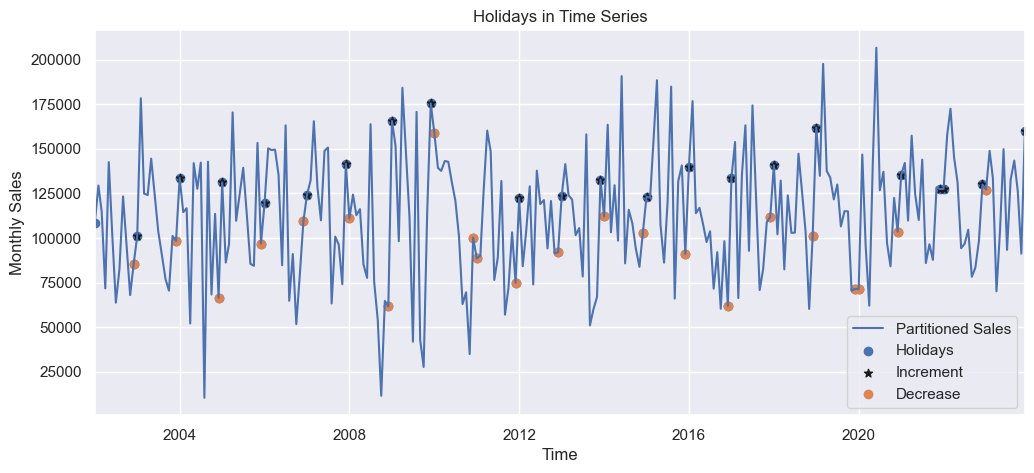

In [75]:
# plot the same for holidayss on the whole time series
plt.plot(df_sales['Monthly Sales']);
plt.scatter(df_hol[df_hol['Period']=='hol']['Month'], df_hol.loc[df_hol['Period']=='hol', 'Mean'])
plt.scatter(df_hol.loc[(df_hol['Mean_diff'] > 0) & (df_hol['Period'] == 'hol')]['Month'], 
            df_hol.loc[(df_hol['Mean_diff'] > 0) & (df_hol['Period'] == 'hol'), 'Mean'], marker='*', c='k', alpha=1.0)
plt.scatter(df_hol.loc[(df_hol['Mean_diff'] <= 0) & (df_hol['Period'] == 'hol')]['Month'], 
            df_hol.loc[(df_hol['Mean_diff'] <= 0) & (df_hol['Period'] == 'hol'), 'Mean'])
plt.xlim(df_sales.index[0], df_sales.index[-1])
plt.xlabel('Time')
plt.ylabel('Monthly Sales')
plt.title('Holidays in Time Series')
plt.legend(['Partitioned Sales', 'Holidays', 'Increment', 'Decrease']);

#### Percentage of Promotion that Result in Average Monthy Sales Increase

In [76]:
# create dataframe to further analyse holiday feature
# categorise holiday according to their effect on average monthly sales
hol_day = df_hol[df_hol['Period'] == 'hol'] 
hol_day = hol_day.fillna(value=hol_day['Mean'].iloc[0])
hol_day.loc[hol_day['Mean_diff'] > 0, 'Period'] = 'incr'
hol_day.loc[hol_day['Mean_diff'] <= 0, 'Period'] = 'dec'

In [77]:
hol_day.head()

,Mean,Min,Period,Month,Mean_diff,Min_diff
0,108592.0,108592,incr,2002-01-01,108592.0,108592.0
2,85358.0,85358,dec,2002-12-01,-13932.8,21600.0
3,101263.0,101263,incr,2003-01-01,15905.0,15905.0
5,98307.0,98307,dec,2003-12-01,-15487.0,27827.0
6,133804.0,133804,incr,2004-01-01,35497.0,35497.0


In [78]:
hol_day.shape

(44, 6)

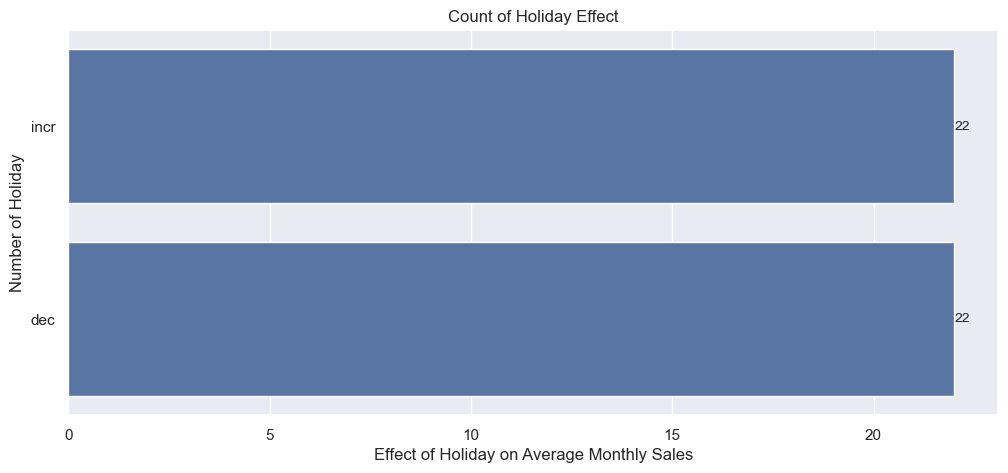

In [79]:
# plot the bar chart to visualize the cumulative average monthly sales across time series
ax = sns.barplot(hol_day['Period'], estimator='count', errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Effect of Holiday on Average Monthly Sales')
plt.ylabel('Number of Holiday')
plt.title('Count of Holiday Effect');

Marginal effect of Holiday on Monthly Sales across Time Series = 460729.89999999997


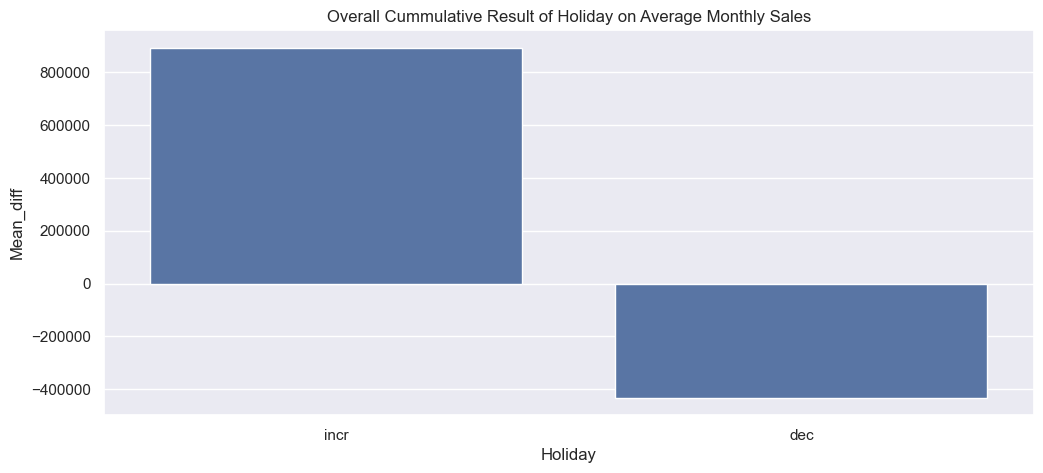

In [80]:
# plot the bar chart of number of promotion that result in both increase or decrease
sns.barplot(hol_day, x='Period', y='Mean_diff', estimator='sum', errorbar=None);
plt.xlabel('Holiday')
plt.title('Overall Cummulative Result of Holiday on Average Monthly Sales');
marginal_hol = hol_day['Mean_diff'].sum(0)
print(f"Marginal effect of Holiday on Monthly Sales across Time Series = {marginal_hol}")

In [81]:
pie_hols = hol_day['Period'].value_counts(normalize=True)

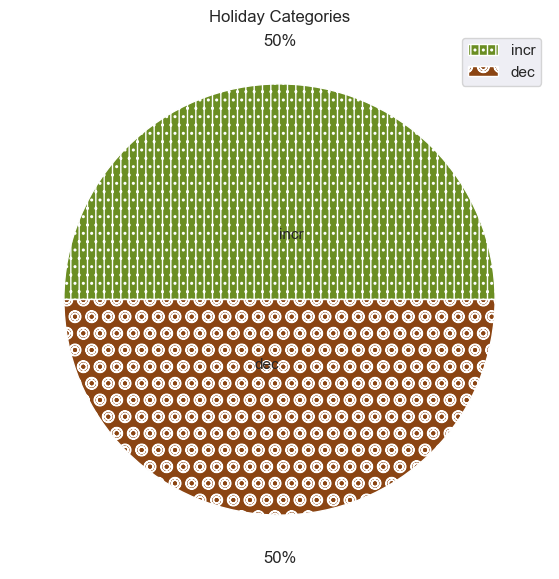

In [82]:
# visualise in a pie chart
plt.figure(figsize=(12,7))
plt.pie(x=pie_hols, labels=pie_hols.index, colors= ['olivedrab', 'saddlebrown'], hatch=['.||.', 'oO'], autopct='%1.0f%%',
        pctdistance=1.2, labeldistance=.3)
plt.title('Holiday Categories')
plt.legend();

#### Best and Worst Holiday

In [83]:
# get the best promotion
filter = hol_day['Mean_diff'] == hol_day['Mean_diff'].max()
best_hols = hol_day[filter]['Mean'].values[0]
best_hols_dt = hol_day[filter]['Month'].values[0]
best_hols_dt = pd.to_datetime(best_hols_dt).date().strftime('%Y-%m-%d')
best_hol_incr = hol_day['Mean_diff'].max()

# get the worst promotion
filter = hol_day['Mean_diff'] == hol_day['Mean_diff'].min()
worst_hols = hol_day[filter]['Mean'].values[0]
worst_hols_dt = hol_day[filter]['Month'].values[0]
worst_hols_dt = pd.to_datetime(worst_hols_dt).date().strftime('%Y-%m-%d')                                                             
worst_hol_decr = hol_day['Mean_diff'].min()

In [84]:
# print the most effective and least effective promotions
print(f'The most effective holiday was on {best_hols_dt} \
with the Average Monthly Sales of {best_hols} and marginal average increment of {best_hol_incr}', end='\n\n')

print(f'The least effective holiday was on {worst_hols_dt} \
with the Average Monthly Sales of {worst_hols} and marginal average increment of {worst_hol_decr}')

The most effective holiday was on 2002-01-01 with the Average Monthly Sales of 108592.0 and marginal average increment of 108592.0

The least effective holiday was on 2019-12-01 with the Average Monthly Sales of 71412.0 and marginal average increment of -54810.5


In [85]:
hol_day['Mean'].max(), hol_day['Mean_diff'].max()

(175416.0, 108592.0)

**Since the best holiday happens to be the very first month of sales, that introduces a bias because there was not sales prior to that time, hence,
we look for the second best holiday.**

In [86]:
# second best holiday
sec_best_hols = hol_day['Mean_diff'].sort_values(ascending=False).iloc[1]
sec_best_hols_dt = hol_day[hol_day['Mean_diff'] == sec_best_hols]['Month'].values[0]
sec_best_hols_dt = pd.to_datetime(sec_best_hols_dt).date().strftime('%Y-%m-%d')
sec_best_hol_incr = hol_day[hol_day['Mean_diff'] == sec_best_hols]['Mean_diff'].max()

# print the most effective and least effective promotions
print(f'The most effective holiday was on {sec_best_hols_dt} \
with the Average Monthly Sales of {sec_best_hols} and marginal average increment of {sec_best_hol_incr}', end='\n\n')

The most effective holiday was on 2009-01-01 with the Average Monthly Sales of 104029.0 and marginal average increment of 104029.0



### Calculation of the Effectiveness of Holiday and Promotion

In [87]:
# we use the marginal monthly sales from both holiday and promotion to determine which is more effective
ts_average = df_sales['Monthly Sales'].mean()
 
# proportion of average monthly sales that accrued from promotion
promo_prop = marginal_promo/ ts_average

# proportion of average monthly sales that accrued from holiday
hol_prop = marginal_hol/ts_average

print('The Average Monthly Sales Across Time Series = ', ts_average)
print('The Proportion of Average Monthly Sales that Accrued from Promotion = ', promo_prop)
print('The Proportion of Average Monthly Sales that Accrued from Holiday = ', hol_prop)

The Average Monthly Sales Across Time Series =  112349.00378787878
The Proportion of Average Monthly Sales that Accrued from Promotion =  0.9918478590939341
The Proportion of Average Monthly Sales that Accrued from Holiday =  4.100881044480678


**Hence, Holiday is more effective that promotion.**

In [88]:
print(f'Holiday is {hol_prop/promo_prop: .2f} times more effective than Promotion')

Holiday is  4.13 times more effective than Promotion
